In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
df_matches=pd.read_csv('WC-DATA\WorldCupMatches.csv')

In [3]:
df_matches.head()

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13-07-1930,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,...,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13-07-1930,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,...,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14-07-1930,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,...,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14-07-1930,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,...,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15-07-1930,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,...,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [4]:
df_matches.shape

(852, 21)

In [5]:
df_matches.columns

Index(['Year', 'Date', 'Time', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [6]:
df_players=pd.read_csv('WC-DATA\WorldCupPlayers.csv')
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [7]:
df_cups=pd.read_csv('WC-DATA\WorldCups.csv')
df_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,"5,90,549"
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,"375,7"
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,"10,45,246"
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,"7,68,607"


In [8]:
## check for null values in all the datasets
print('Null values in matches dataset',df_matches.isnull().sum().sum())
print('Null values in players dataset',df_players.isnull().sum().sum())
print('Null values in cups dataset',df_cups.isnull().sum().sum())

Null values in matches dataset 2
Null values in players dataset 62356
Null values in cups dataset 0


In [9]:
df_matches.isnull().sum()

Year                    0
Date                    0
Time                    0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

The two missing values are in the attendance column of the matches dataset

In [10]:
df_players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

The max number of missing data is in the position and event columns of the data 

In [11]:
df_players.isnull().sum()/df_players.shape[0]

RoundID          0.000000
MatchID          0.000000
Team Initials    0.000000
Coach Name       0.000000
Line-up          0.000000
Shirt Number     0.000000
Player Name      0.000000
Position         0.890350
Event            0.759978
dtype: float64

89% of the total data is missing in the Position column and 76% of the total data is missing from the Event column therefore we can remove the two columns 

In [12]:
df_matches.isnull().sum()

Year                    0
Date                    0
Time                    0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [13]:
df_matches.dropna(inplace=True)  ## dropping the missing values from the matches dataset

In [14]:
df_matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [15]:
df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [16]:
wrong_names=list(df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts().index)
wrong_names

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [17]:
correct_names=[name.split('>')[1] for name in wrong_names]
correct_names

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

We can observe that Germany is named as Germany FR (Federal Republic) which is an old name , Maracan� - Est�dio Jornalista M�rio Filho' and Estadio de maracana are Maracanã Stadium representing the same thing

In [18]:
incorrect_names = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
final_wrong_names=wrong_names+incorrect_names
final_wrong_names

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'Germany FR',
 'Maracan� - Est�dio Jornalista M�rio Filho',
 'Estadio do Maracana']

In [19]:
correct_names=correct_names+['Germany', 'Maracan Stadium', 'Maracan Stadium']
correct_names

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'Germany',
 'Maracan Stadium',
 'Maracan Stadium']

In [20]:
for i,name in enumerate(final_wrong_names):
    df_matches.replace(final_wrong_names[i],correct_names[i],inplace=True)
    df_cups.replace(final_wrong_names[i],correct_names[i],inplace=True)
    df_players.replace(final_wrong_names[i],correct_names[i],inplace=True)

In [21]:
df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name']

Series([], Name: Home Team Name, dtype: object)

### World Cup Titles

In [22]:
## winner count
winners=df_cups['Winner'].value_counts()
winners

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [23]:
## runner ups
runner_ups=df_cups['Runners-Up'].value_counts()
runner_ups


Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [24]:
## Third place 
third=df_cups['Third'].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [25]:
team_data=pd.concat([winners,runner_ups,third],axis=1).fillna(0).astype(int)
team_data.reset_index(inplace=True)

In [28]:
team_data.rename(columns={'index':'Country'},inplace=True)
team_data.head()

,Country,Winner,Runners-Up,Third
0,Brazil,5,2,2
1,Italy,4,2,1
2,Germany,4,4,4
3,Uruguay,2,0,0
4,Argentina,2,3,0


<Figure size 1500x800 with 0 Axes>

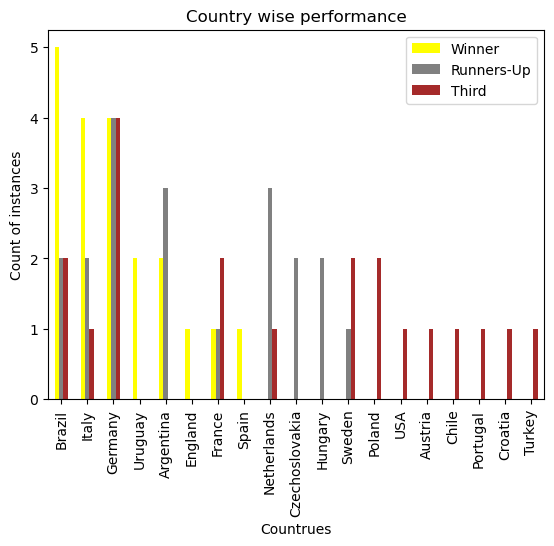

In [35]:
plt.figure(figsize=(15,8))
team_data.plot(kind='bar',x='Country',stacked=False,color=['yellow','grey','brown'])
plt.xlabel("Countrues")
plt.ylabel("Count of instances")
plt.title("Country wise performance")
plt.show()


## Total Goals scored by each coutry

In [36]:
df_matches.head()

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13-07-1930,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,...,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13-07-1930,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,...,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14-07-1930,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,...,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14-07-1930,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,...,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15-07-1930,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,...,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [37]:
df_matches[['Home Team Name','Home Team Goals']]

,Home Team Name,Home Team Goals
0,France,4
1,USA,3
2,Yugoslavia,2
3,Romania,3
4,Argentina,1
...,...,...
847,Netherlands,0
848,Brazil,1
849,Netherlands,0
850,Brazil,0
